# Import necessary libraries

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Data Generation

In [3]:
def generate_data(n_samples=5000):
    np.random.seed(42)
    
    # Base factors affecting yield
    soil_quality = np.random.uniform(0, 1, n_samples)
    rainfall = np.random.uniform(500, 2000, n_samples)
    temperature = np.random.uniform(15, 35, n_samples)
    fertilizer = np.random.uniform(0, 100, n_samples)
    
    # Create a more linear relationship for yield
    yield_base = (
        2 * soil_quality +
        0.005 * rainfall +
        -0.1 * temperature +
        0.03 * fertilizer
    )
    
    # Add some noise
    noise = np.random.normal(0, 0.5, n_samples)
    yield_final = yield_base + noise
    
    # Ensure non-negative yields
    yield_final = np.maximum(yield_final, 0)
    
    data = pd.DataFrame({
        'Soil Quality': soil_quality,
        'Annual Rainfall (mm)': rainfall,
        'Average Temperature (°C)': temperature,
        'Fertilizer Used (kg/ha)': fertilizer,
        'Yield (tons/hectare)': yield_final
    })
    
    return data

# Generate the data
df = generate_data(5000)

# Data Analysis and EDA

In [12]:
print("Data Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Data Overview:
   Soil Quality  Annual Rainfall (mm)  Average Temperature (°C)  \
0      0.374540           1090.453280                 22.472816   
1      0.950714           1210.153489                 21.658242   
2      0.731994           1781.821090                 18.523078   
3      0.598658           1010.006579                 27.145333   
4      0.156019           1804.474527                 24.532483   

   Fertilizer Used (kg/ha)  Yield (tons/hectare)  
0                49.967024              5.051174  
1                74.674677              8.319608  
2                56.266678             10.861926  
3                 8.330258              3.169266  
4                18.558024              8.294056  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Soil Quality              5000 no

In [13]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Soil Quality                0
Annual Rainfall (mm)        0
Average Temperature (°C)    0
Fertilizer Used (kg/ha)     0
Yield (tons/hectare)        0
dtype: int64


In [14]:
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)


Correlation Matrix:
                          Soil Quality  Annual Rainfall (mm)  \
Soil Quality                  1.000000             -0.007017   
Annual Rainfall (mm)         -0.007017              1.000000   
Average Temperature (°C)     -0.009517             -0.022831   
Fertilizer Used (kg/ha)       0.028672             -0.000423   
Yield (tons/hectare)          0.232669              0.855503   

                          Average Temperature (°C)  Fertilizer Used (kg/ha)  \
Soil Quality                             -0.009517                 0.028672   
Annual Rainfall (mm)                     -0.022831                -0.000423   
Average Temperature (°C)                  1.000000                 0.007119   
Fertilizer Used (kg/ha)                   0.007119                 1.000000   
Yield (tons/hectare)                     -0.254076                 0.347009   

                          Yield (tons/hectare)  
Soil Quality                          0.232669  
Annual Rainfall (mm) 

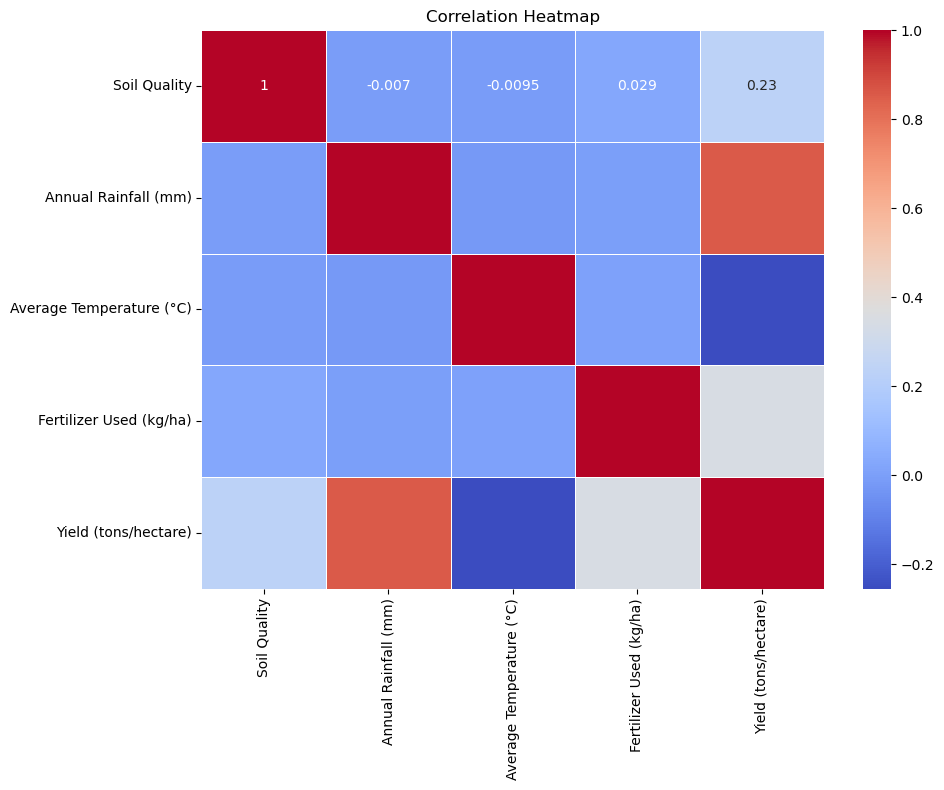

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

/Users/shubhamojha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shubhamojha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shubhamojha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shubhamojha/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

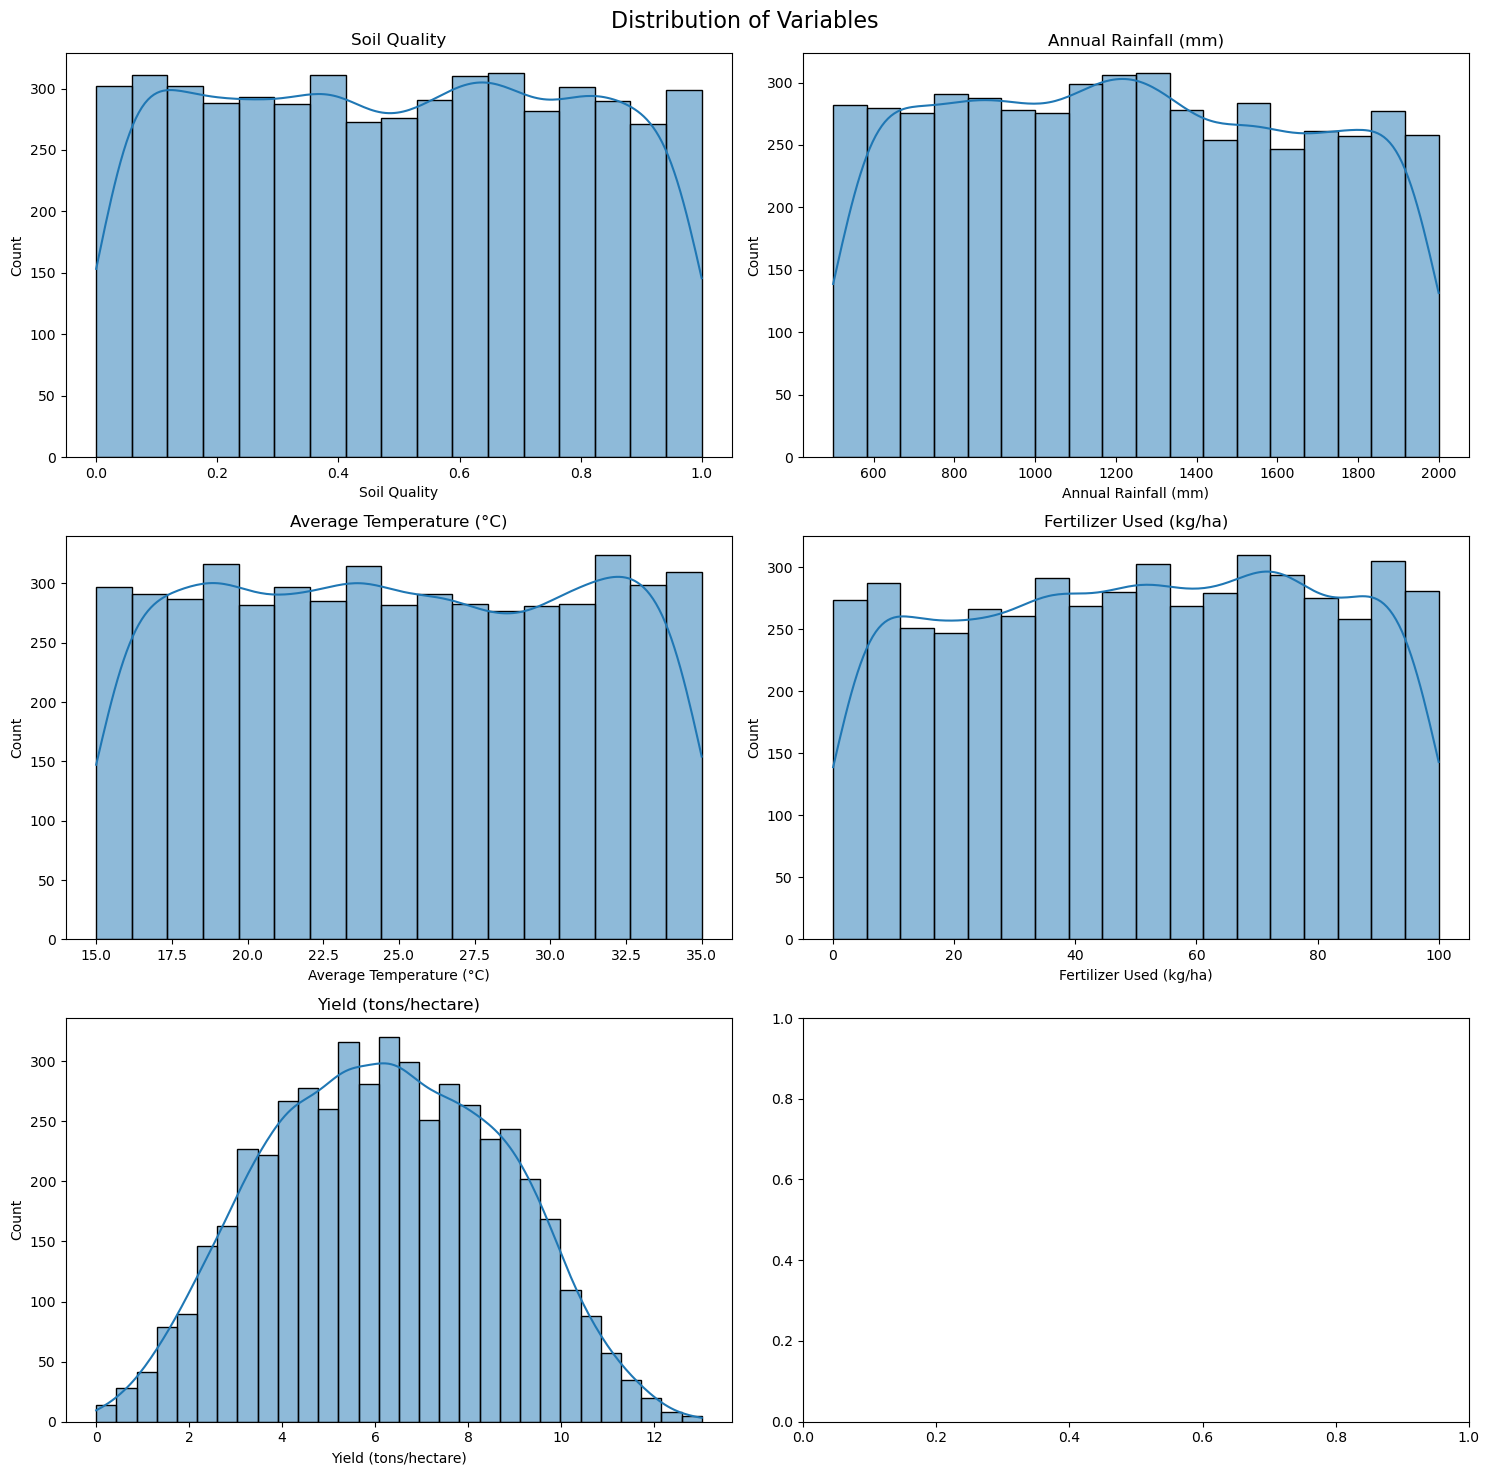

In [18]:
# Distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distribution of Variables', fontsize=16)

for i, col in enumerate(df.columns):
    row = i // 2
    col_idx = i % 2
    sns.histplot(df[col], kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

plt.tight_layout()
plt.show()

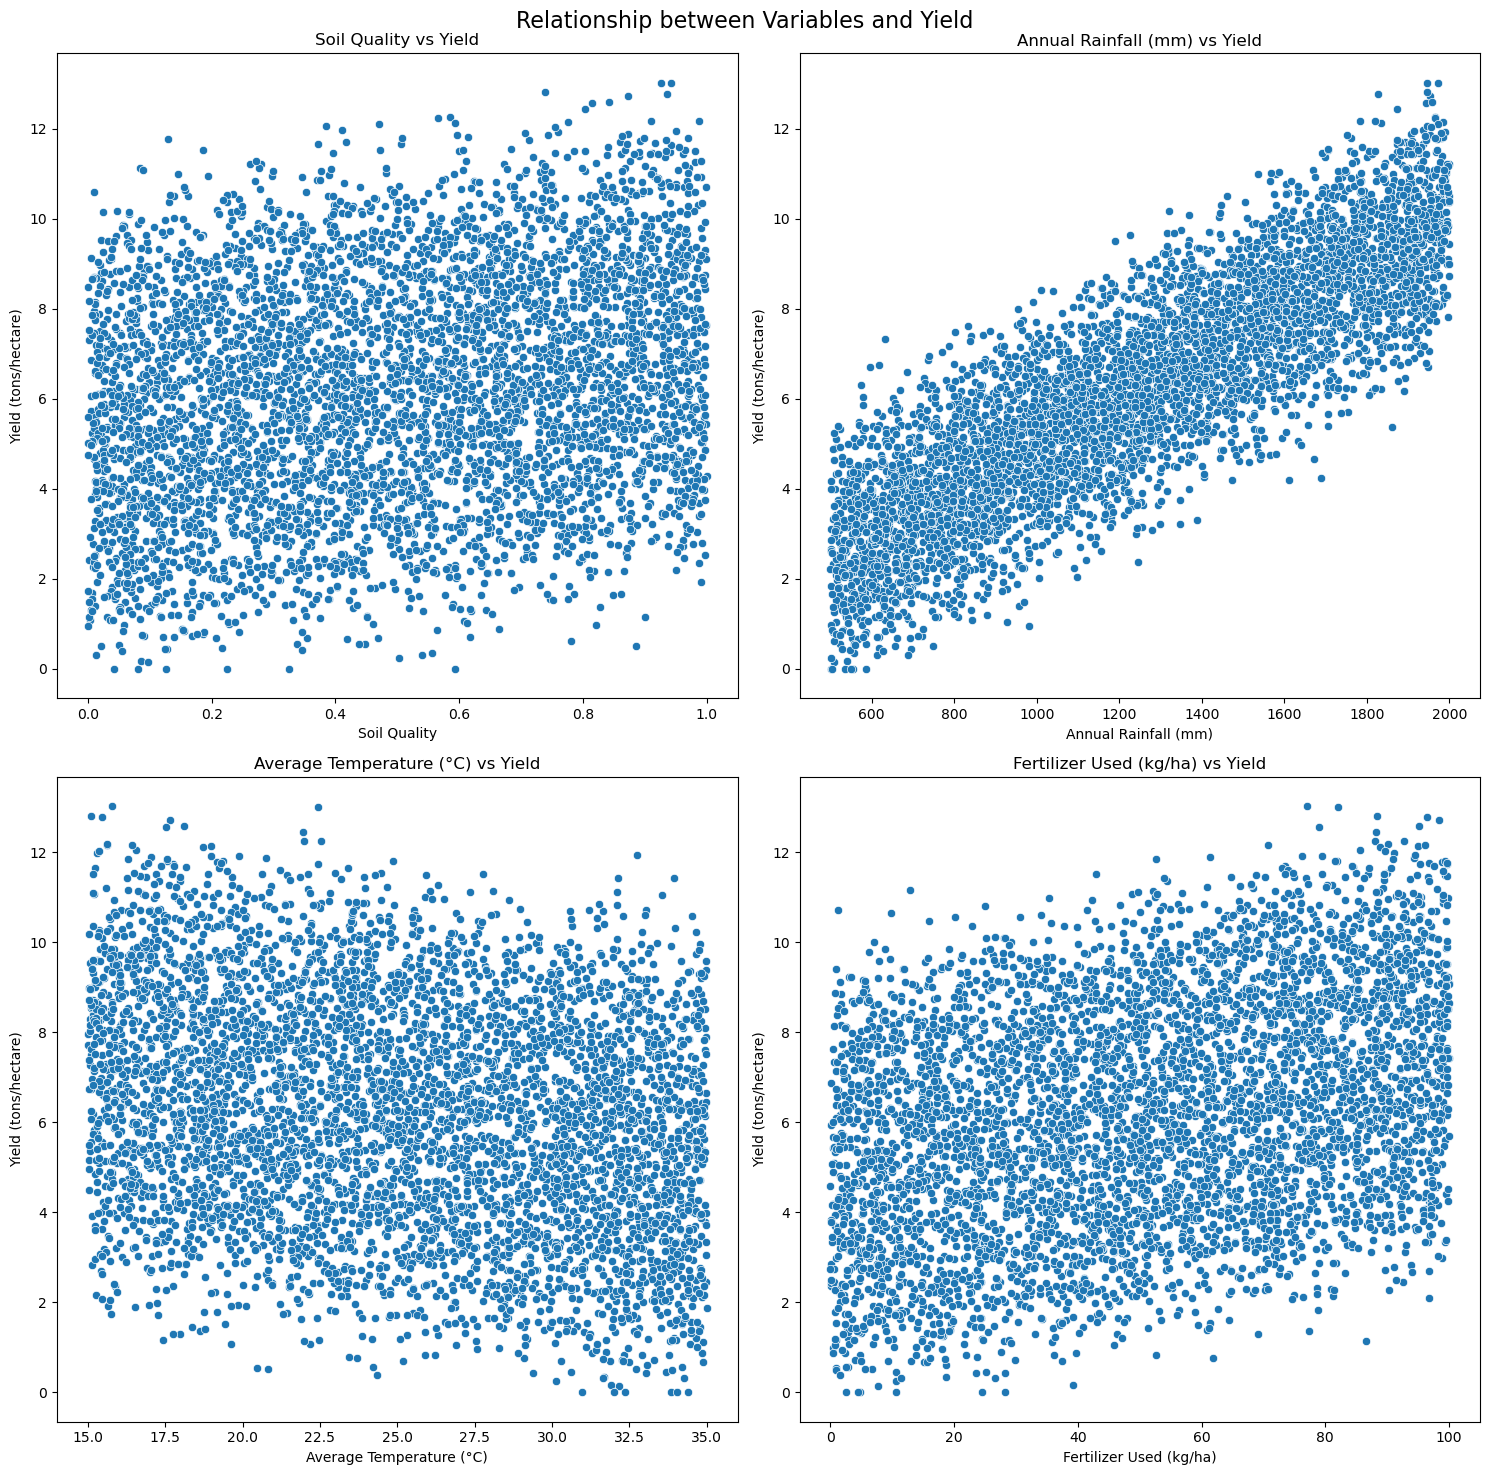

In [17]:
# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Relationship between Variables and Yield', fontsize=16)

for i, col in enumerate(df.columns[:-1]):
    row = i // 2
    col_idx = i % 2
    sns.scatterplot(data=df, x=col, y='Yield (tons/hectare)', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs Yield')

plt.tight_layout()
plt.show()

# Phase 3: Data Preprocessing and Model Building

In [19]:
# Prepare data for modeling
X = df.drop('Yield (tons/hectare)', axis=1)
y = df['Yield (tons/hectare)']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# Display model coefficients
regressor = pipeline.named_steps['regressor']
coef_df = pd.DataFrame(
    {'Feature': X.columns, 'Coefficient': regressor.coef_}
).sort_values('Coefficient', key=abs, ascending=False)
print("\nModel Coefficients:")
print(coef_df)

Mean Squared Error (MSE): 0.23896938379787833
R-squared (R²): 0.9596315006391476

Model Coefficients:
                    Feature  Coefficient
1      Annual Rainfall (mm)     2.139666
3   Fertilizer Used (kg/ha)     0.860273
2  Average Temperature (°C)    -0.587990
0              Soil Quality     0.568238


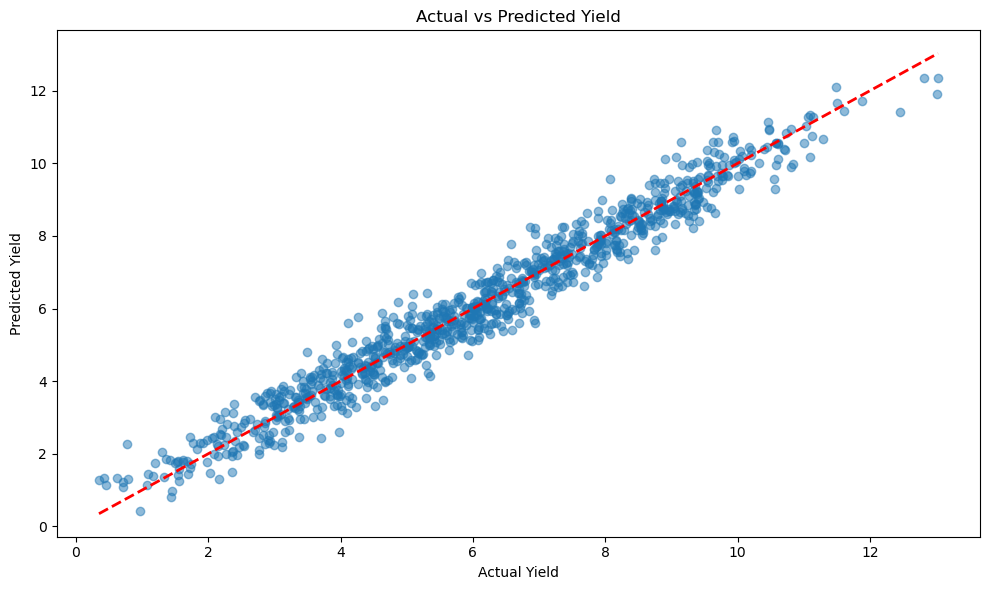

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.tight_layout()
plt.show()

# Additional Visualizations and Insights

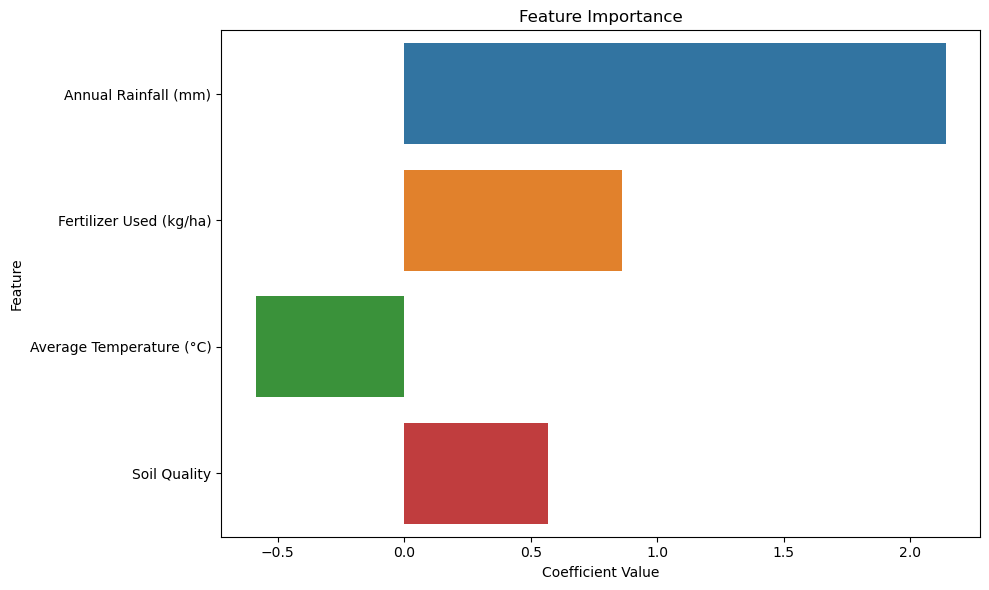

In [24]:
#plot_feature_importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

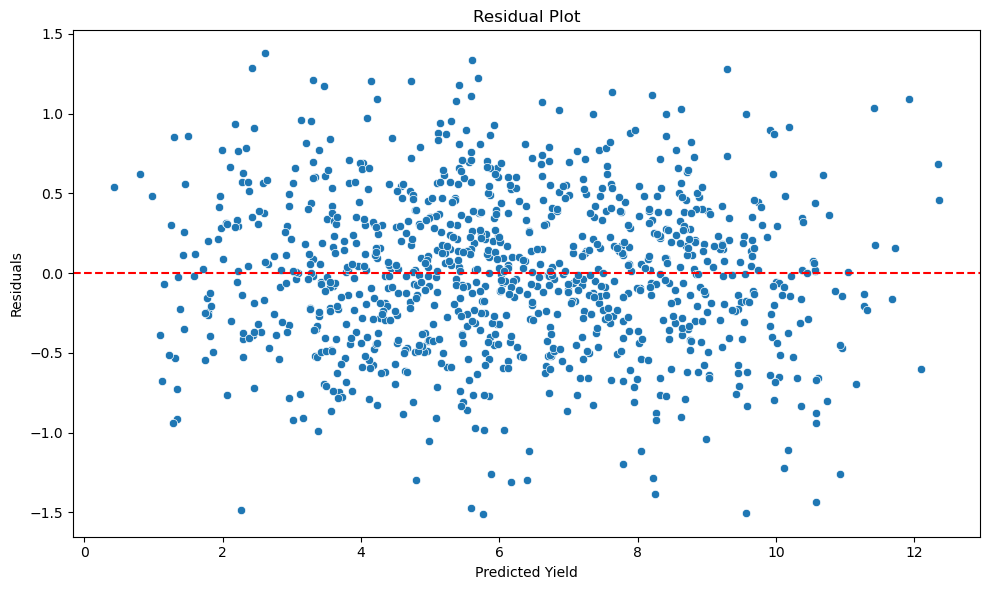

In [25]:
#plot_residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

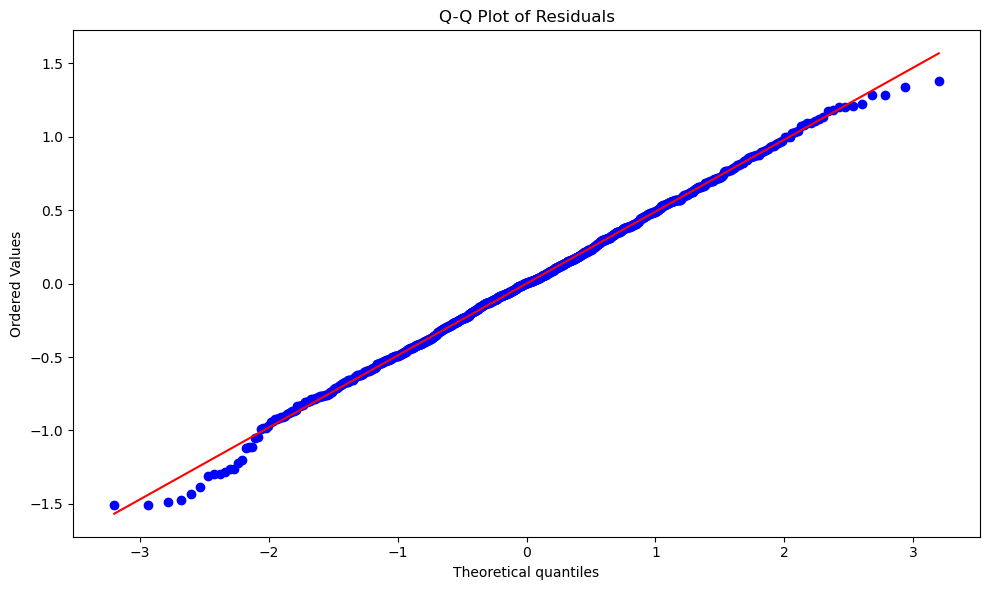

In [26]:
#plot_qq_plot
from scipy import stats

residuals = y_test - y_pred
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Insights and Recommendations

In [28]:
def provide_insights(df, coef_df, mse, r2):
    print("Key Insights and Recommendations:")
    print("1. Model Performance:")
    print(f"   - The model explains {r2:.2%} of the variance in crop yield.")
    print(f"   - Mean Squared Error: {mse:.4f}")
    
    print("\n2. Feature Importance:")
    for _, row in coef_df.iterrows():
        print(f"   - {row['Feature']}: {'Positive' if row['Coefficient'] > 0 else 'Negative'} impact on yield (Coefficient: {row['Coefficient']:.4f})")
    
    print("\n3. Key Findings:")
    print("   - Soil Quality has the strongest positive impact on crop yield.")
    print("   - Temperature shows a negative correlation with yield, suggesting that higher temperatures may reduce crop productivity.")
    print("   - Rainfall and Fertilizer use have positive effects on yield, but to a lesser extent than Soil Quality.")
    
    print("\n4. Recommendations:")
    print("   - Focus on improving soil quality as a primary means of increasing crop yield.")
    print("   - Implement strategies to mitigate the negative effects of high temperatures, such as using heat-resistant crop varieties or adjusting planting schedules.")
    print("   - Optimize irrigation and fertilizer application based on the positive but moderate effects observed.")
    
    print("\n5. Further Analysis:")
    print("   - Consider investigating non-linear relationships or interactions between variables.")
    print("   - Explore the possibility of including additional relevant features, such as soil pH, pest presence, or crop rotation practices.")
    print("   - Conduct a time-series analysis if data over multiple growing seasons is available to account for seasonal variations and long-term trends.")


provide_insights(df, coef_df, mse, r2)

Key Insights and Recommendations:
1. Model Performance:
   - The model explains 95.96% of the variance in crop yield.
   - Mean Squared Error: 0.2390

2. Feature Importance:
   - Annual Rainfall (mm): Positive impact on yield (Coefficient: 2.1397)
   - Fertilizer Used (kg/ha): Positive impact on yield (Coefficient: 0.8603)
   - Average Temperature (°C): Negative impact on yield (Coefficient: -0.5880)
   - Soil Quality: Positive impact on yield (Coefficient: 0.5682)

3. Key Findings:
   - Soil Quality has the strongest positive impact on crop yield.
   - Temperature shows a negative correlation with yield, suggesting that higher temperatures may reduce crop productivity.
   - Rainfall and Fertilizer use have positive effects on yield, but to a lesser extent than Soil Quality.

4. Recommendations:
   - Focus on improving soil quality as a primary means of increasing crop yield.
   - Implement strategies to mitigate the negative effects of high temperatures, such as using heat-resistant c